# Analysis of Ford GoBike System Data
### by Rohith Sowmithra

### Introduction

> Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.
The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.
The above mentioned Data Set focuses on information with regard to the individual rides undertaken in a bike-sharing system expanded over the greater San Francisco Bay Area.

### Preliminary Wrangling

This document explores the Ford GoBike's system data for public. It contains information about 18,63,721 bike rides for FY2018.

## Table of Contents

<a href="#gather">1. Gather Data</a></li>

<a href="#explore">2. Explore Data</a>

<a href="#univariate">2.a. Univariate Analysis</a>

<a href="#bivariate">2.b. Bivariate Analysis</a>  

<a href="#multivariate">2.c. Multivariate Analysis</a>

<a href="#conclude">3. Conclusion</a>

<a id="gather"></a>
## Gather Data
> Here, we gather data by downloading zip files from the source, then extract the zip files and combine them into a single file which can be used for analysis. We'll only download data pertaining to FY2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import requests
import time

%matplotlib inline

In [2]:
# location where all the datset files are available for download in zip format
index_url = "https://s3.amazonaws.com/fordgobike-data/"

cur_directory = getcwd()

makedirs("data")

filepath = cur_directory + '/data/'

start_time = time.time()

# logic to download the csv datasets for 2018 year
for months in range(1,13):
    month = str(months).zfill(2)
    
    # format a url to make a download link
    dataset_url = index_url + "2018" + month + "-fordgobike-tripdata.csv.zip"
    
    # make a request to download a zip file particular to a month
    response = requests.get(dataset_url)
    
    # ZipFile is to open a zip file and BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
    
    # places the downloaded zip file into folder data
    unzipped_file.extractall(filepath)
    
end_time = time.time()

elapsed_time = end_time - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print(f"Time taken to download all zip files is {elapsed_time_str}")

Time taken to download all zip files is 00:01:06


In [3]:
filelist = []

# append csv file to a fileslist
for name in listdir(filepath):
    filelist.append(pd.read_csv(filepath + '/' + name))

# combine all csvs into a single file and read it in a dataframe    
df = pd.concat(filelist)

In [4]:
# print first 5 rows of the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# get the total number of rows and columns in the dataset
print(df.shape)

(1863721, 16)


In [6]:
# write the combined dataframe to a file
df.to_csv(filepath + '/' + 'data.csv')

<a id="explore"></a>
## Explore Data
> Here, we explore data either by doing programmatical assessment or visual assessments. 

In [7]:
# Make of copy of the dataset for our analysis
df_copy = df.copy()

In [8]:
# do programmatical assesment of data using info()
df_copy.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  member_birth_year        1753003 non-null  

From above output we see that thera are some missing values in station ids and names and also in 'member_birth_year' and 'member_gender' columns. 

In [9]:
# number of duplicates in the dataset
sum(df_copy.duplicated())

0

### What is the structure of your dataset?

> Our dataset has information about 1863721 bike rides that were taken by users in 2018. It consists of details about trip duration, start & end times, stations and user's personal information.

### What is/are the main feature(s) of interest in your dataset?

> I'm interesting in understanding the following patterns.
    - Demand of bikes based on time so that more bikes can be placed during the peak time and vice-versa.
    - Usage patterns of different user types (Customers and Subscribers).
    - Gender-wise usage of system so that different kinds of bikes can be made available in areas with more number of same genders.
    - Age group influence on bike rides.
    - Impact of season on usage of bike sharing platform etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My analysis should revolve more around Trip timings, User types, Genders and Age. We'll derive the needed features if existing features don't support our analysis. Ex: Deriving age from Date of Birth, hour|day|month|year from datetime columns etc.

### Remove unwanted features
Before we proceed with data exploration, we remove the features from our dataset that aren't needed for our analysis.

Features ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_share_for_all_trip'] will not support us in our analysis. So, we remove them as shown below.

In [10]:
# drop the columns specified above
df_copy.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_share_for_all_trip'],axis = 1, inplace = True)

# display the dataframe structure after dropping the columns above
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration_sec        int64  
 1   start_time          object 
 2   end_time            object 
 3   start_station_name  object 
 4   end_station_name    object 
 5   bike_id             int64  
 6   user_type           object 
 7   member_birth_year   float64
 8   member_gender       object 
dtypes: float64(1), int64(2), object(6)
memory usage: 142.2+ MB


<a id="univariate"></a>
## Univariate Exploration

> In this section, we'll investigate distributions of individual variables.

**1. Average Duration of the trips**

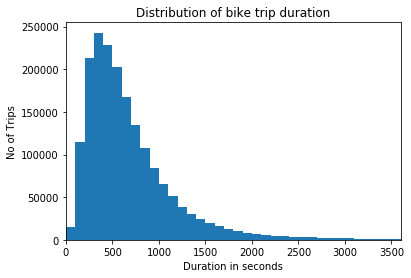

In [11]:
# plot a histogram for distribution of bike trip duration
bin_edges = np.arange(0, df_copy.duration_sec.max() + 100, 100)
plt.hist(data = df_copy, x = 'duration_sec', bins = bin_edges);
plt.xlim(0,3600);
plt.title('Distribution of bike trip duration');
plt.xlabel('Duration in seconds');
plt.ylabel('No of Trips');

From above histogram we see that distribution is right skewed. So, to make the distribution normalized, let's apply logarthmic transformation across X-axis.
Also, to make the visual more appropriate/effective, let's convert the duration in seconds to minutes and visualize.

In [12]:
# create a new column called 'duration_min' by converting duration in sec to minutes and then drop 'duration_sec' column
df_copy['duration_min'] = df_copy['duration_sec'] / 60
df_copy.drop('duration_sec', axis=1, inplace=True)

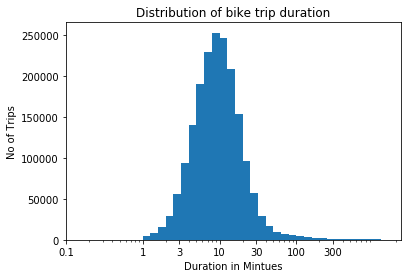

In [13]:
# now apply log transformation on 'duration_min' column and re-visualize the histogram

bin_edges = 10 ** np.arange(0, 3.15+0.1, 0.1)
ticks =  [ 0.1 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
sb.distplot(df_copy['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.title('Distribution of bike trip duration')
plt.xlabel('Duration in Mintues')
plt.ylabel('No of Trips')
plt.xscale('log')
plt.xticks(ticks, labels);

- From the above figure we see that most of the users have taken short duration trips i.e trips with duration of about 10 min.

- We have to understand if the factor 'weather' (Spring, Summer, Autumn, WInter) has any impact on trip duration in bivariate plot.

**2. Gender-wise usage of bike platform**

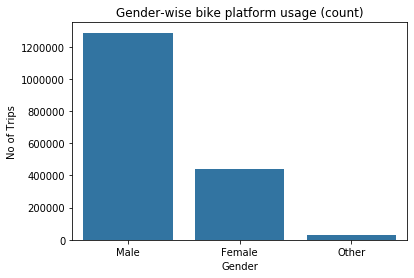

In [14]:
# plot a bar chart for gender vs frequency
base_color = sb.color_palette()[0]
sb.countplot(data=df_copy, x='member_gender', color=base_color);
plt.title('Gender-wise bike platform usage (count)');
plt.xlabel('Gender');
plt.ylabel('No of Trips');

Above bar chart gives us the absolute frequency of gender-wise usage statistics. But, it would be better if we plot a relative frequency distribution as shown below.

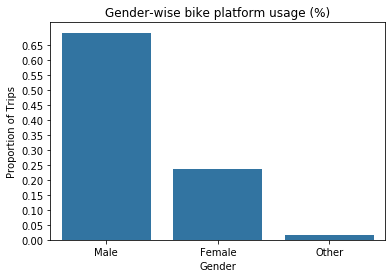

In [15]:
df_copy.member_gender.value_counts()

# get proportion taken by most common group for derivation
n_points = df_copy.shape[0]
max_count = df_copy['member_gender'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'member_gender', color = base_color);
plt.title('Gender-wise bike platform usage (%)');
plt.xlabel('Gender');
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('Proportion of Trips');

Above graph clearly shows that 65% of the users are Male, ~20% of the users are female and less than 5% of the users belong to other gender. 

**3. Bike sharing platform user's Age distribution**

In [16]:
# create an age column based on 'member_birth_year' column
df_copy['current_year'] = 2020
df_copy['member_age'] = df_copy['current_year'] - df_copy['member_birth_year']
df_copy.drop('current_year', axis=1, inplace=True)

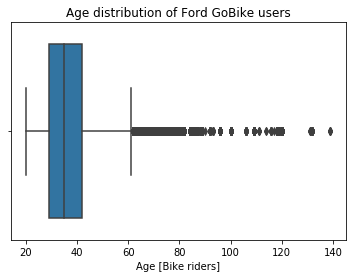

In [17]:
sb.boxplot(data=df_copy, x='member_age', orient='h');
plt.title("Age distribution of Ford GoBike users");
plt.xlabel("Age [Bike riders]");

From above visualization, we see that 95% of the users who take rides are in between 18 to 60 years of age. Also, there are users with age > 100 yrs which we consider to be outliers and will remove from our dataset. 

In [18]:
# remove users with age > 100. They aren't useful for our analysis
df_copy = df_copy[df_copy.member_age <= 60]

In [19]:
# check the size of our dataset after removing users with age > 100
df_copy.shape

(1699220, 10)

We see that a few users in our dataset with age > 100. In this case, I have eliminated users with age > 60 (as 60 is the 95th percentile of age) for our analysis. We can always revisit all phases of data wrangling whenever changes are made to our dataset. In this case, we won't revisit because we consider eliminated users to be of minimal proportion.

**4. Usertype distribution**

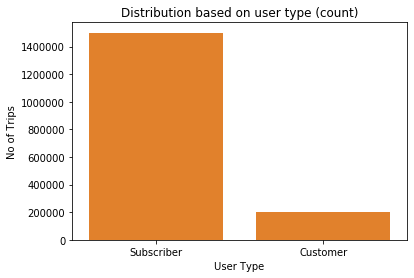

In [20]:
base_color = sb.color_palette()[1]
sb.countplot(data=df_copy, x='user_type', color=base_color);
plt.title("Distribution based on user type (count)");
plt.xlabel("User Type");
plt.ylabel("No of Trips");

Above visual shows that number of subscribers have taken far more number of rides than customers.

**5. Hourly usage of bike sharing system**

We have to extract the following features to plot this.

In [21]:
# make start_time and end_time columns as datetime dtypes
df_copy.start_time = pd.to_datetime(df_copy.start_time)
df_copy.end_time = pd.to_datetime(df_copy.end_time)

In [22]:
# extract the start time hour as an integer
df_copy['start_hour'] = df_copy.start_time.dt.hour.astype(int)

# extracting the day as integer from start_time
df_copy['start_day'] = df_copy.start_time.dt.strftime('%a')

# extracting the weekday as a string from start_time
df_copy['start_weekday'] = df_copy['start_time'].dt.strftime('%a')

# extracting the month as an integer from start_time
df_copy['start_month'] = df_copy.start_time.dt.month.astype(int)

# extracting month name as a string from staret_time
df_copy['start_month_name'] = df_copy.start_time.dt.strftime('%B')

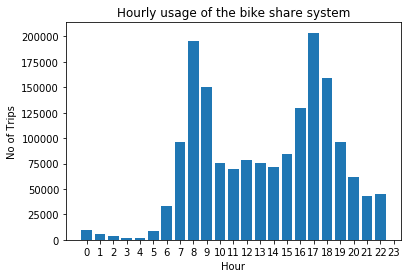

In [23]:
# plot aq histogram
bin_edges = np.arange(0, df_copy.start_hour.max() + 1, 1)
tick_locs = np.arange(0,24)
base_color = sb.color_palette()[0]
tick_names = ['{}'.format(v) for v in tick_locs]
plt.hist(data=df_copy, x='start_hour', bins = bin_edges, color = base_color, rwidth=0.8)
plt.xlabel("Hour")
plt.ylabel("No of Trips")
plt.title('Hourly usage of the bike share system');
plt.xticks(tick_locs+0.5, tick_names);

We see a bimodal distribution in the above graph. a user is typically taking a ride at 8 AM in the morning and also at 5 PM in the evening which gives an idea that peak distribution is observed for people who are using the system for commuting. But, there are more subscribers than Customers as shown in above plot, which may significantly impact this distrbution. We'll need to confirm the impact of user type on hourly usage in bivariate distribution.

**6. Top 10 starting points for the rides**

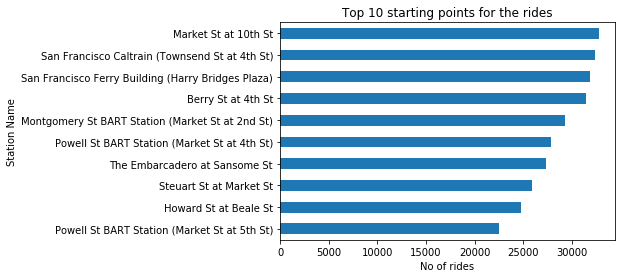

In [24]:
top10_start_points = df_copy.start_station_name.value_counts()[1:11].sort_values()
base_color = sb.color_palette()[0]
top10_start_points.plot(kind = 'barh', color=base_color)
plt.title('Top 10 starting points for the rides')
plt.xlabel('No of rides')
plt.ylabel('Station Name');

We see that there are 4 stations with more than 25k rides as starting point. This provides us an insight to focus on making more bikes available in that region.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are a few trips with duration greater than 8 hours which seem to be of not much interest to us. So, have set the max duration upper limit to 3600 sec (1 hr) which made the distribution right-skewed. We then applied log transformation across the duration axis and made the distribution normalized. This helped us in knowing that most of the trips are for short duration ~10 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are a couple of users whose birth year is before 1900. Have removed it and only retained the rows with user age < 60 (which is the 95th percentile for age).

<a id="bivariate"></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data.

**1. Average trip duration with respect to seasons**

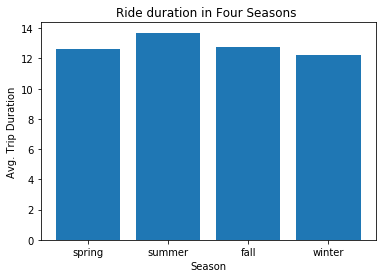

In [25]:
# categorize months into seasons and draw bar plot
spring = df_copy.query('start_month in ["3" , "4" , "5"]').duration_min.mean()
summer = df_copy.query('start_month in ["6" , "7" , "8"]').duration_min.mean()
fall = df_copy.query('start_month in ["9" , "10" , "11"]').duration_min.mean()
winter = df_copy.query('start_month in ["12" , "1" , "2"]').duration_min.mean()

# plot the bar diagram
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter])
plt.title('Ride duration in Four Seasons ')
plt.xlabel('Season')
plt.ylabel('Avg. Trip Duration');

On an average people take more bike rides in summer season and least in winter season.

**2. Month-wise trip duration distribution**

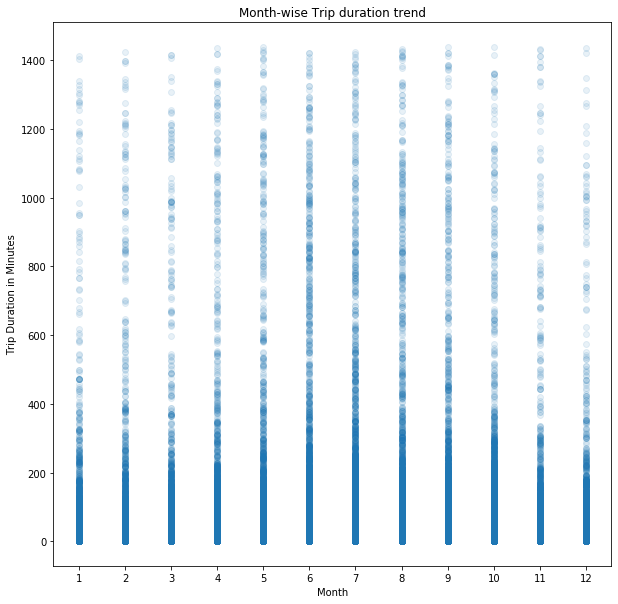

In [26]:
# plot a scatterplot for Month-wise trip duration
plt.figure(figsize = [10,10]) # Makes the figure enlarged for better visualization
tick_loc = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_labels = ['{}'.format(v) for v in tick_loc]
plt.scatter(data = df_copy , x = 'start_month' , y = 'duration_min', alpha = 0.1);
plt.title('Month-wise Trip duration trend');
plt.xticks(tick_loc, tick_labels);
plt.xlabel('Month');
plt.ylabel('Trip Duration in Minutes');

From above figure we observe that June to Aug 2018 has the most trip duration. But for other months, we do not observe a significant difference.

**3. Hourly usage of bike sharing system per user_type**

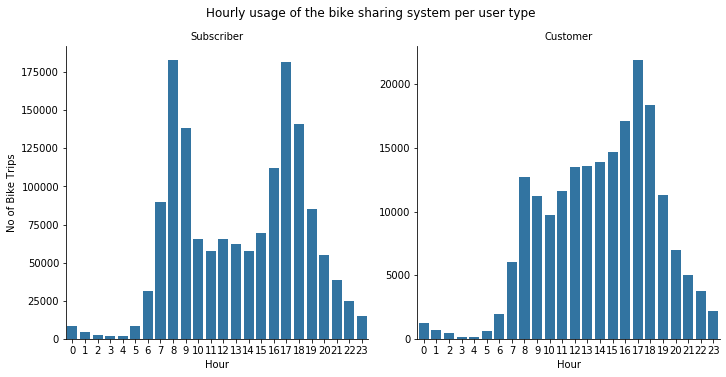

In [27]:
# hourly usege of the bike sharing system per user type
base_color = sb.color_palette()[0]
g = sb.catplot(data=df_copy, x='start_hour', col="user_type", kind='count', sharey = False,
            color = base_color);
g.set_axis_labels("Hour", "No of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike sharing system per user type', y=1.04);

Subscribers tend to use the system at around 8-9am and 5-6pm when they go to and come back from work. While customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm.

**4. Trip duration (min) per user_type**

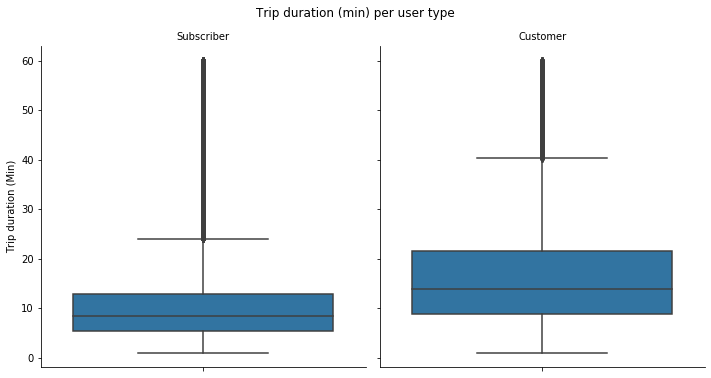

In [28]:
# boxplot for duration (min) distribution per user type
data = df_copy.query('duration_min < 60')
base_color = sb.color_palette()[0]
g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (Min)")
g.fig.suptitle('Trip duration (min) per user type', y=1.04);

Looking at boxplots above, we see that trip durations are longer for customers (10 to > 20 minutes) than for subscribers (7 to 13 minutes). This explains the fact that subscribers take take shorter trips to work rather than longer trips which is often the case with customers.

**5. Monthly usage of bike share system per user type**

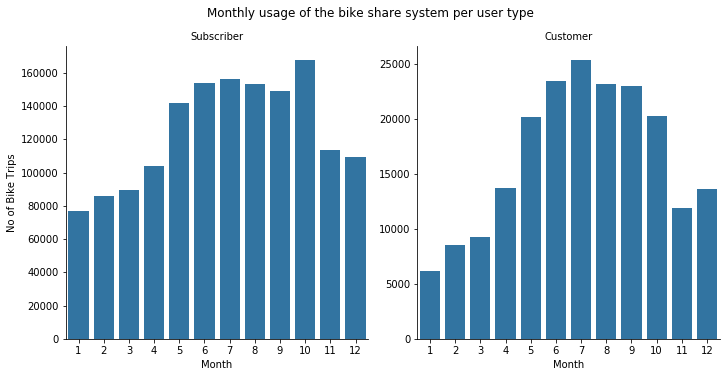

In [29]:
# monthly usege of the bike sharing system per user type
base_color = sb.color_palette()[0]
g = sb.catplot(data=df_copy, x='start_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "No of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.04);

Looking at barplots above, we see that trip Subscribers usually take more trips from May through October and Customers usually prefer Summer (Jun-Aug) for rides. We also see that winters (Dec-Jan) are not much preferred by both Subscribers and Customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> In bivariate analysis we have analyzed quite a few interesting relationships.
    - Users tend to ride a lot in summer and least prefer winter for rides. i.e June-Aug 2018 had received more number of rides.
    - Adding user_type to our analysis has some interesting observations.i.e we have understood patterns in how and when subscribers and customers use the system. Subscribers only use the system for short rides/commutes and customers usually go for longer rides.
        - 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> There is a clear distinction in trip duration between Customers and Subscribers. Customers usually take longer rides than Subscribers usaully in Summer, but Subscribers do short rides leaving an impression that they are taking rides for commuting to work.

<a id="multivariate"></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate the data even
further.

**1. Hourly usage during weekdays per user type**

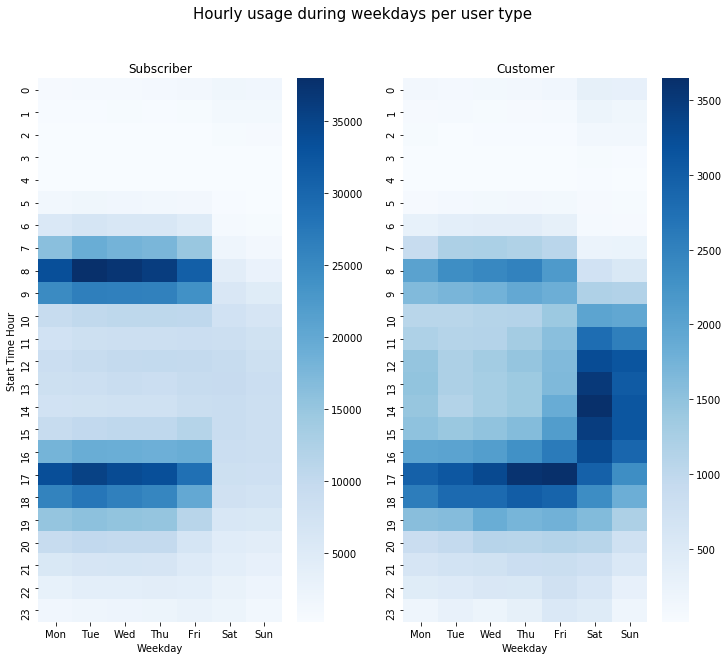

In [30]:
# set the weekday order
wdays = pd.api.types.CategoricalDtype(ordered = True, categories = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])

df_copy['start_weekday'] = df_copy['start_weekday'].astype(wdays)

# plotting visualizations

plt.figure(figsize = (12,10))
plt.suptitle("Hourly usage during weekdays per user type", fontsize=15)

# plot a heatmap for a subscriber
plt.subplot(1,2,1)
df_subscriber = df_copy.query('user_type == "Subscriber"').groupby(['start_hour', 'start_weekday'])['bike_id'].size().reset_index()
df_subscriber = df_subscriber.pivot(index='start_hour', columns='start_weekday', values='bike_id')
sb.heatmap(df_subscriber, cmap='Blues');
plt.title("Subscriber", y=1.02);
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');

# plot a heatmap for a customer
plt.subplot(1,2,2)
df_customer = df_copy.query('user_type == "Customer"').groupby(['start_hour', 'start_weekday'])['bike_id'].size().reset_index()
df_customer = df_customer.pivot(index='start_hour', columns='start_weekday', values='bike_id')
sb.heatmap(df_customer, cmap='Blues');
plt.title("Customer", y=1.02);
plt.xlabel('Weekday');
plt.ylabel('');

Above heatmap explains how Subscribers and Customers uses the bike sharing system during weekdays and weekends. Subscriber's heatmap shows that they use from Mon thru Fri for commuting and they don't use on Sat & Sun. Whereas Customer's heatmap shows that they tend to use the system mainly on weekends specifying that they don't use it for regular commuting.

**2. Trip duration per usertype and gender**

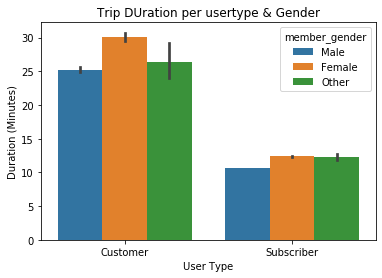

In [31]:
sb.barplot(data=df_copy, x='user_type', y='duration_min', hue='member_gender', order=df_copy.user_type.value_counts(ascending=True).index);
plt.title("Trip DUration per usertype & Gender");
plt.xlabel('User Type');
plt.ylabel('Duration (Minutes)');

From above barplot we can see that in both user categories (Subscriber and Customers) Females tend to take longer duration rides. Also, in both user types categories 'Other' genders are taking more rides than 'Male'.

**3. No of Bike Trips per User type and Gender**

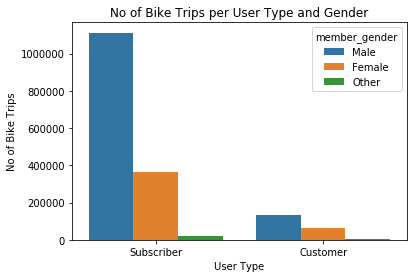

In [32]:
# plot a bar chart below
sb.countplot(data=df_copy, x="user_type", hue="member_gender", order=df_copy.user_type.value_counts().index);
plt.xlabel('User Type');
plt.ylabel('No of Bike Trips');
plt.title("No of Bike Trips per User Type and Gender");

Above bar chart shows that Male users are using the system more than Female in Subscriber category, but, there is no huge difference between the usage of system between Male and Female users in Customer category. Also, Other genders are using the system very less when compared to Male and Female.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 'Hourly usage during weekdays per user type' heatmap has shown some interesting patterns in usage by the users. 
    - Subscribers usually start to office/work between 7AM-9AM and return from work between 4PM-6PM.
    - Subscribers tend to use the system the least in other times than mentioned above.
    - Few Customers use the system for commuting as like Subscribers (in same timings), but the number of Customers are not as huge as Subscribers.
        - Customers would love to take rides throughout the day on weekends (9AM-6PM) indicating that they take joy rides.

### Were there any interesting or surprising interactions between features?

> One surprising interaction found is that Number of Male users who use the bike sharing system are more than Female and Other genders, but, Female users spend more time on rides than Male. Infact Other genders spend more time on rides than Male. This indicates that Male users use the system more, but for quick short rides.

<a id="conclude"></a>
## Conclusion

In this project we have derived some interesting usage patterns by grouping customers, gender, seasons, age etc. Visualizations shown for most of them are explanatory and can be understood easily. Conclusion for each section of analysis has been provided in the respective sections.

**Limitations**

It has to be understood that the inferences made in this project are specific to this analysis and can't be generalized. It has to be just viewed as a medium for visual assessment.
